In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.gridspec as gridspec
%matplotlib notebook
%matplotlib inline
plt.style.use('seaborn-colorblind')

In [5]:
annc_df = pd.read_excel('MichiganCensus.xlsx',skiprows=3).rename(columns={'Unnamed: 0':'Area'}).dropna()                        
usac_df = pd.read_excel('USACensus.xlsx',skiprows=3).rename(columns={'Unnamed: 0':'Area'}).dropna() 
annc_df = annc_df[annc_df['Area'] == 'Ann Arbor city, Michigan']
annc_df.drop(['Census','Estimates Base','Area'],inplace=True,axis=1)
usac_df.drop(['Census','Estimates Base'],inplace=True,axis=1)
usac_df = usac_df[(usac_df.sum(axis=1) > 1000000) & (usac_df.sum(axis=1) < 1500000)]
years = list(map(int,annc_df.columns))
annc_e = []
for i in years:
    annc_e.append(int(annc_df[i]))
country_avg = list(map(float,usac_df.mean(axis=0)))   

In [6]:
income_df = pd.read_csv('Median Household Income.csv')
income_df = income_df.where((income_df['Geography'] == 'Ann Arbor, MI') |
                       (income_df['Geography'] == 'United States')).dropna()
myears = [2017,2016,2015,2014,2013]
myears = myears[::-1]
mann = income_df[income_df['Geography'] == 'Ann Arbor, MI'] 
musa = income_df[income_df['Geography'] == 'United States'] 
wann = list(map(int,mann['Household Income by Race']))
wusa = list(map(int,musa['Household Income by Race']))
wann = wann[::-1]
wusa = wusa[::-1]
muyears = []
for i in myears:
    muyears.append(i+0.3)

In [7]:
anncom_df = pd.read_csv('AnnArborUnivs.csv')
uscom_df = pd.read_csv('NationalUnivs.csv')
uscom_df = uscom_df[(uscom_df['Sector'] == 'Public, 4-year or above') |
                   (uscom_df['Sector'] == 'Private not-for-profit, 4-year or above')]
uscom_df = uscom_df[uscom_df['Completions'] > 10000]
uscom_df = uscom_df.groupby('Year')['Completions'].mean()
anncom_df = anncom_df.groupby('Year')['Completions'].sum()
anncom = list(map(int,anncom_df.values))
uscom = list(map(float,uscom_df.values))
eyears = list(map(int,anncom_df.index))
plt.figure()
uyears = []
for i in eyears:
    uyears.append(i+0.3)

<Figure size 432x288 with 0 Axes>

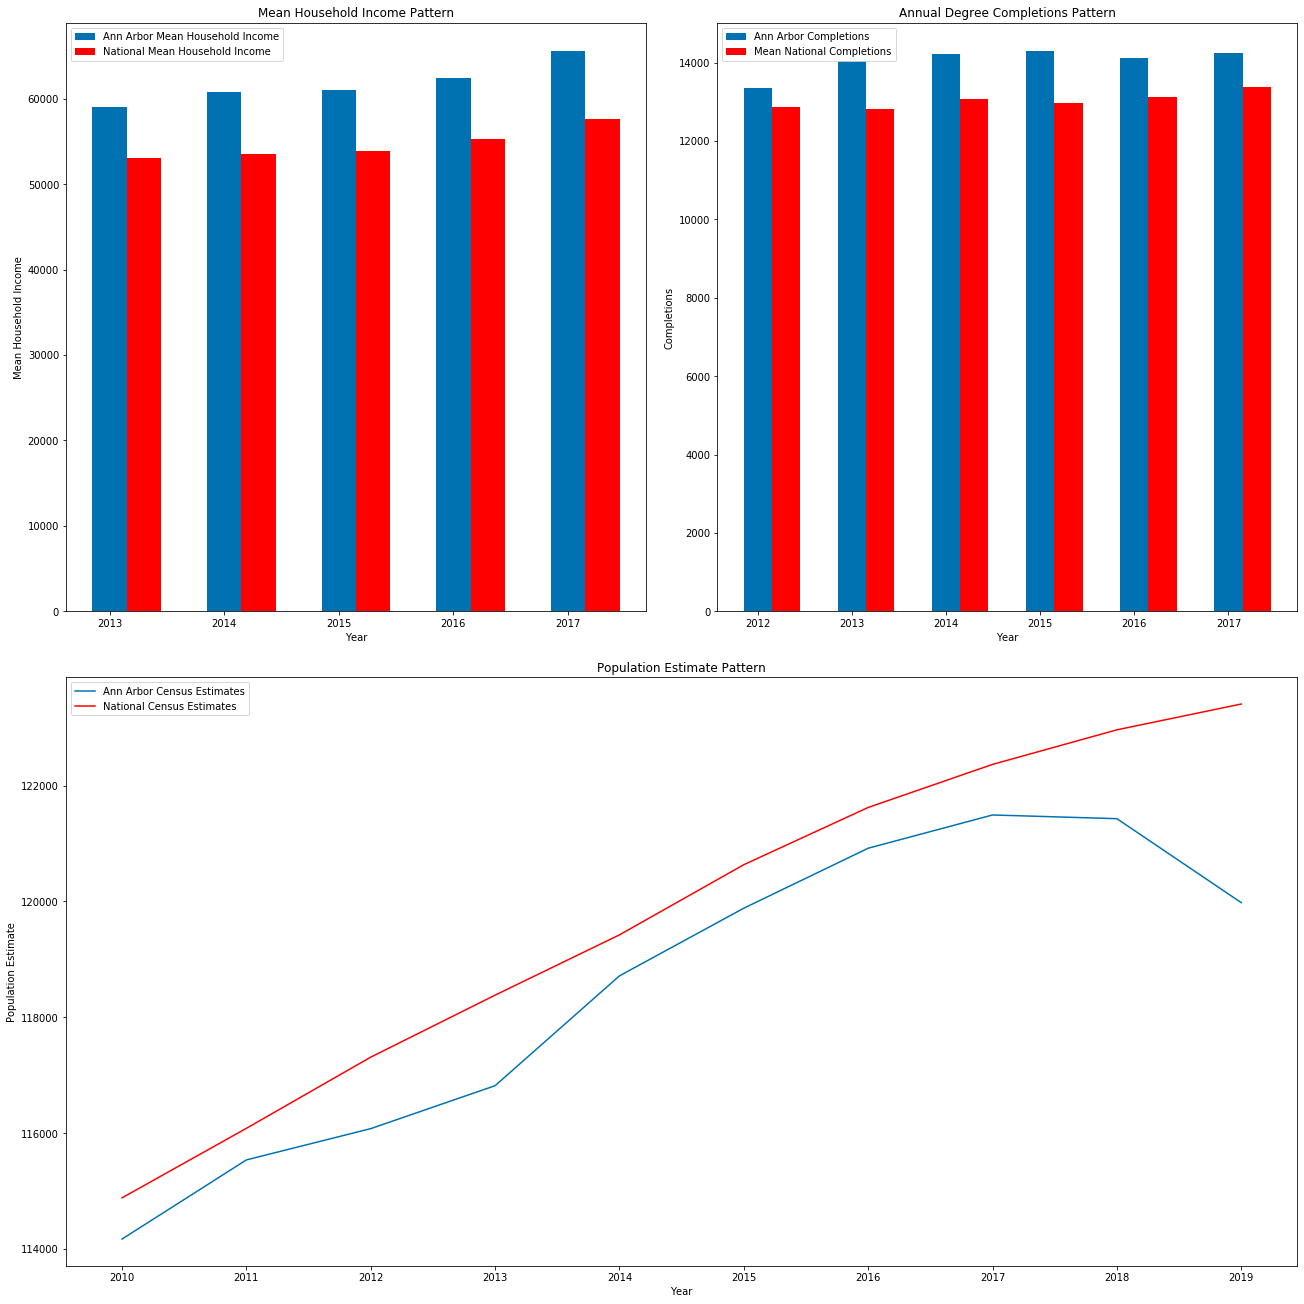

In [8]:
fig = plt.figure(constrained_layout=True,figsize=(18,18))
f = fig.add_gridspec(2,2)
income = fig.add_subplot(f[0,0])
comp = fig.add_subplot(f[0,1])
pop = fig.add_subplot(f[1,:])

pop.set_xticks(years)
pop.set_xlabel('Year')
pop.set_ylabel('Population Estimate')
pop.plot(years,annc_e,label = 'Ann Arbor Census Estimates')
pop.plot(years,country_avg,label = 'National Census Estimates',color='red')
pop.set_title('Population Estimate Pattern')
pop.legend();

comp.bar(eyears,anncom,label='Ann Arbor Completions',width=0.3)
comp.bar(uyears,uscom,label='Mean National Completions',width=0.3,color='red')
comp.set_xlabel('Year')
comp.set_ylabel('Completions')
comp.set_title('Annual Degree Completions Pattern')
comp.legend();

income.bar(myears,wann,label='Ann Arbor Mean Household Income',width = 0.3)
income.bar(muyears,wusa,label='National Mean Household Income',width = 0.3,color='red')
income.set_xlabel('Year')
income.set_ylabel('Mean Household Income')
income.set_title('Mean Household Income Pattern')
income.legend();
